In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('pleaserun.db')
data = pd.read_sql_query("SELECT * FROM FEstats", conn)

data.head(5)

,game_number,victory_rank,survival_rank,tactic_rank,units
0,0,F,2,14,Raven-Rebecca-Hector
1,1,F,2,25,Raven-Sain-Hector
2,2,F,1,5,Erk-Dart-Lyn
3,3,F,3,46,Raven-Guy-Lyn
4,4,F,3,8,Lucius-Matthew-Hector


In [2]:
data['victory_rank'].value_counts()

F    166351
S     83649
Name: victory_rank, dtype: int64

([<matplotlib.patches.Wedge at 0x174dfb130>,
 [Text(-0.5462168783028004, 0.954802137543242, 'F'),
  Text(0.5462169676978257, -0.9548020864027229, 'S')],
 [Text(-0.29793647907425475, 0.5208011659326773, '67%'),
  Text(0.2979365278351776, -0.5208011380378488, '33%')])

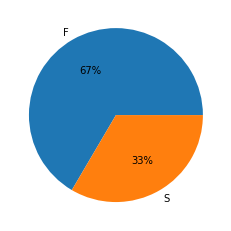

In [3]:
vc = data['victory_rank'].value_counts()
plt.pie(vc, labels=vc.index, autopct='%.0f%%')

<AxesSubplot:xlabel='victory_rank', ylabel='game_number'>

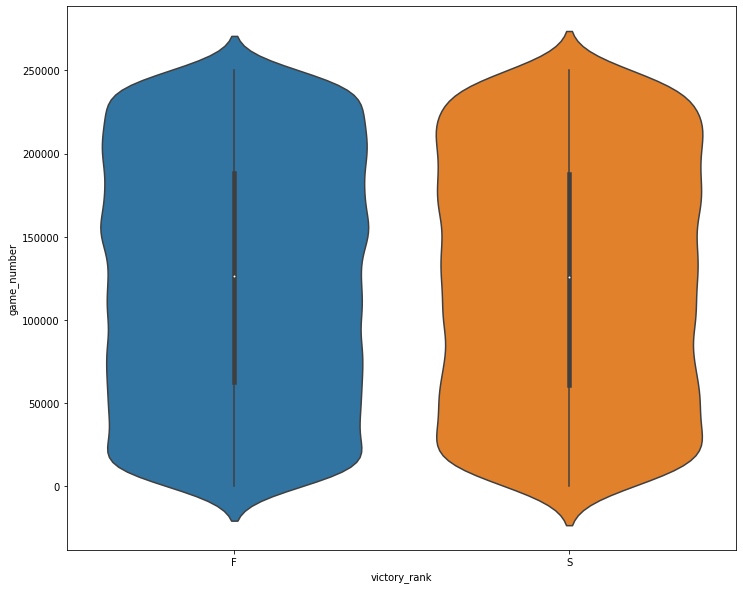

In [8]:
plt.figure(figsize=(12,10))
sns.violinplot(x='victory_rank', y='game_number', data=data.sample(frac=0.1))

<AxesSubplot:xlabel='survival_rank', ylabel='game_number'>

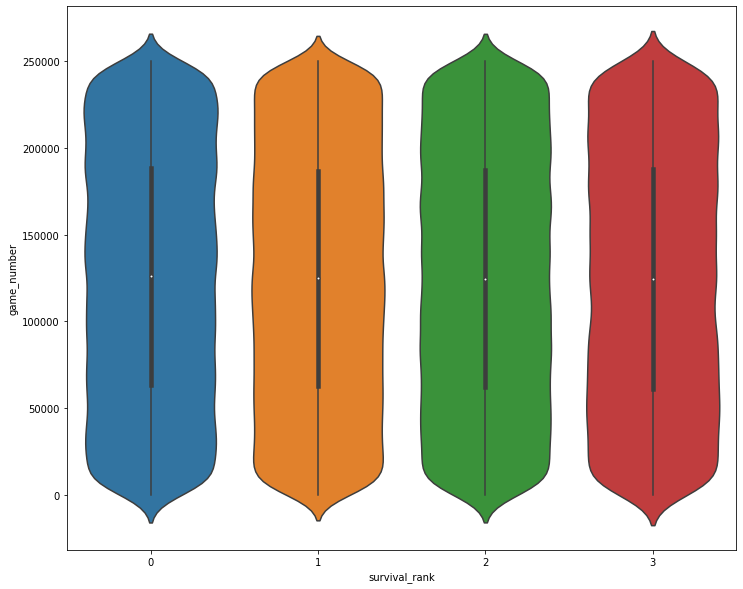

In [9]:
plt.figure(figsize=(12,10))
sns.violinplot(x='survival_rank', y='game_number', data=data)

In [10]:
data['survival_rank'].value_counts()

1    89056
2    61457
0    60182
3    39305
Name: survival_rank, dtype: int64

<AxesSubplot:xlabel='game_number', ylabel='tactic_rank'>

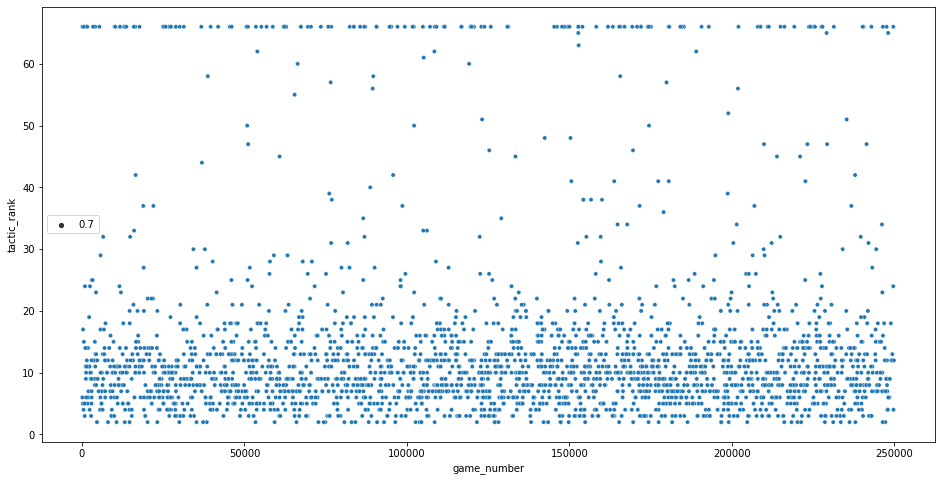

In [12]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='game_number', y='tactic_rank', data=data.sample(frac=0.01), size=0.7)

In [13]:
data[["unit_1", "unit_2", "unit_3"]] = data["units"].str.split(pat="-", expand=True)
data.head(10)

,game_number,victory_rank,survival_rank,tactic_rank,units,unit_1,unit_2,unit_3
0,0,F,2,14,Raven-Rebecca-Hector,Raven,Rebecca,Hector
1,1,F,2,25,Raven-Sain-Hector,Raven,Sain,Hector
2,2,F,1,5,Erk-Dart-Lyn,Erk,Dart,Lyn
3,3,F,3,46,Raven-Guy-Lyn,Raven,Guy,Lyn
4,4,F,3,8,Lucius-Matthew-Hector,Lucius,Matthew,Hector
5,5,F,2,28,Rebecca-Oswin-Eliwood,Rebecca,Oswin,Eliwood
6,6,S,0,30,Oswin-Guy-Eliwood,Oswin,Guy,Eliwood
7,7,F,1,5,Erk-Heath-Eliwood,Erk,Heath,Eliwood
8,8,F,1,3,Sain-Florina-Lyn,Sain,Florina,Lyn
9,9,F,1,4,Bartre-Erk-Hector,Bartre,Erk,Hector


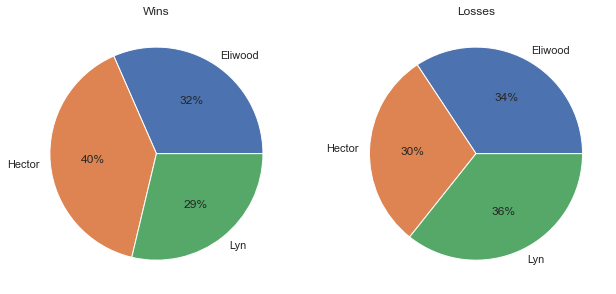

In [14]:
wins = data[data['victory_rank'] == 'S'].value_counts(subset='unit_3').sort_index()
losses = data[data['victory_rank'] == 'F'].value_counts(subset='unit_3').sort_index()

labels = ['Eliwood', 'Hector', 'Lyn']
sns.set_theme()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins, labels=labels, autopct='%.000f%%')
axs[1].pie(losses, labels=labels, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()

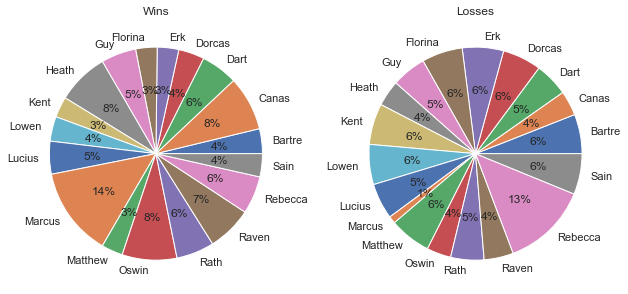

In [15]:
all_wins = data[data['victory_rank'] == 'S']
m_all_wins = pd.melt(all_wins, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])
all_losses = data[data['victory_rank'] == 'F']
m_all_losses = pd.melt(all_losses, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])

wins_count = m_all_wins.value_counts(subset='value').sort_index()
loss_count = m_all_losses.value_counts(subset='value').sort_index()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins_count, labels=wins_count.index, autopct='%.0f%%')
axs[1].pie(loss_count, labels=loss_count.index, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()